In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('delivery_data.csv')

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:33:33,11:45:29,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:37,19:51:49,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:32:58,8:48:47,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:03:58,18:12:52,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:34:16,13:45:36,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
df.shape

(41953, 20)

In [ ]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41953 entries, 0 to 41952
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           41953 non-null  object 
 1   Delivery_person_ID           41953 non-null  object 
 2   Delivery_person_Age          41953 non-null  object 
 3   Delivery_person_Ratings      41953 non-null  object 
 4   Restaurant_latitude          41953 non-null  float64
 5   Restaurant_longitude         41953 non-null  float64
 6   Delivery_location_latitude   41953 non-null  float64
 7   Delivery_location_longitude  41953 non-null  float64
 8   Order_Date                   41953 non-null  object 
 9   Time_Orderd                  40353 non-null  object 
 10  Time_Order_picked            41953 non-null  object 
 11  Weatherconditions            41953 non-null  object 
 12  Road_traffic_density         41953 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.nunique()

,0
ID,41953
Delivery_person_ID,1170
Delivery_person_Age,23
Delivery_person_Ratings,29
Restaurant_latitude,388
Restaurant_longitude,388
Delivery_location_latitude,4362
Delivery_location_longitude,4362
Order_Date,44
Time_Orderd,25569


In [ ]:
df['Time_taken(min)'][0].strip(' ')

'(min) 24'

In [ ]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '', regex=False).str.strip().astype(int)
display(df.head())

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:33:33,11:45:29,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:37,19:51:49,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:32:58,8:48:47,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:03:58,18:12:52,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:34:16,13:45:36,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [ ]:
digit_col = []
for col in df.select_dtypes(include = ['int64' , 'float64']).columns:
  digit_col.append(col)

In [ ]:
df[digit_col].corr()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Time_taken(min)
Restaurant_latitude,1.000000,0.004645,0.999977,0.005120,0.000256,0.012185
Restaurant_longitude,0.004645,1.000000,0.004638,0.999945,0.003897,0.006680
Delivery_location_latitude,0.999977,0.004638,1.000000,0.005183,0.000316,0.014335
Delivery_location_longitude,0.005120,0.999945,0.005183,1.000000,0.003991,0.010042
Vehicle_condition,0.000256,0.003897,0.000316,0.003991,1.000000,-0.235016
Time_taken(min),0.012185,0.006680,0.014335,0.010042,-0.235016,1.000000


In [ ]:
df = df.drop(columns=['ID','Delivery_person_ID'])

In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:33:33,11:45:29,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:37,19:51:49,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:32:58,8:48:47,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:03:58,18:12:52,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:34:16,13:45:36,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41953 entries, 0 to 41952
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          41953 non-null  object 
 1   Delivery_person_Ratings      41953 non-null  object 
 2   Restaurant_latitude          41953 non-null  float64
 3   Restaurant_longitude         41953 non-null  float64
 4   Delivery_location_latitude   41953 non-null  float64
 5   Delivery_location_longitude  41953 non-null  float64
 6   Order_Date                   41953 non-null  object 
 7   Time_Orderd                  40353 non-null  object 
 8   Time_Order_picked            41953 non-null  object 
 9   Weatherconditions            41953 non-null  object 
 10  Road_traffic_density         41953 non-null  object 
 11  Vehicle_condition            41953 non-null  int64  
 12  Type_of_order                41953 non-null  object 
 13  Type_of_vehicle 

In [ ]:
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
mean_age = df['Delivery_person_Age'].mean()
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(round(mean_age)).astype(int)

In [ ]:
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
mean_rating = df['Delivery_person_Ratings'].mode()[0]
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(mean_rating).astype(int)

In [ ]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"], format="%d-%m-%Y")
df["order_day"] = df["Order_Date"].dt.day
df["order_month"] = df["Order_Date"].dt.month
df["order_weekday"] = df["Order_Date"].dt.weekday
df["is_weekend"] = df["order_weekday"].isin([5, 6]).astype(int)

In [ ]:
df["Time_Orderd"] = df["Time_Orderd"].replace("NaN", pd.NA)
temp_datetime = pd.to_datetime(df["Time_Orderd"], format="%H:%M:%S", errors="coerce")
median_time = temp_datetime.dropna().median()
temp_datetime = temp_datetime.fillna(median_time)
df["order_hour"] = temp_datetime.dt.hour
df["order_min"] = temp_datetime.dt.minute


In [ ]:
df = df[df["Time_Orderd"].notna()]

In [ ]:
df["Time_Order_picked"] = pd.to_datetime(df["Time_Order_picked"], format="%H:%M:%S", errors="coerce").dt.time

df["picked_hour"] = pd.to_datetime(df["Time_Order_picked"], format="%H:%M:%S", errors="coerce").dt.hour
df["picked_min"] = pd.to_datetime(df["Time_Order_picked"], format="%H:%M:%S", errors="coerce").dt.minute

df["pickup_delay_min"] = (df["picked_hour"]*60 + df["picked_min"]) - (df["order_hour"]*60 + df["order_min"])
df["pickup_delay_min"] = df["pickup_delay_min"].clip(lower=0)

In [ ]:
df["Weatherconditions"] = df["Weatherconditions"].str.replace("conditions ", "").str.strip()
df["Weatherconditions"] = df["Weatherconditions"].replace("NaN", "Unknown")

In [ ]:
df["Type_of_vehicle"] = df["Type_of_vehicle"].str.strip()
df["Type_of_order"] = df['Type_of_order'].str.strip()
df["Road_traffic_density"] = df['Road_traffic_density'].str.strip()

In [ ]:
df["multiple_deliveries"] = df["multiple_deliveries"].replace("NaN", pd.NA)
df["multiple_deliveries"] = df["multiple_deliveries"].astype("float")
df["multiple_deliveries"] = df["multiple_deliveries"].fillna(df["multiple_deliveries"].mode()[0])
df["multiple_deliveries"] = df["multiple_deliveries"].astype(int)

In [ ]:
df["Festival"] = df["Festival"].str.strip()
df["Festival"] = df["Festival"].replace("NaN" , "No")

In [ ]:
df['City'] = df['City'].str.strip()
df['City'] = df['City'].replace("NaN" , df['City'].mode()[0])

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
  print(f'{col}:')
  print(df[col].unique())

Time_Orderd:
['11:33:33' '19:45:37' '8:32:58' ... '21:47:47' '23:50:56' '17:12:55']
Time_Order_picked:
[datetime.time(11, 45, 29) datetime.time(19, 51, 49)
 datetime.time(8, 48, 47) ... datetime.time(22, 3, 10)
 datetime.time(11, 48, 7) datetime.time(13, 42)]
Weatherconditions:
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
Road_traffic_density:
['High' 'Jam' 'Low' 'Medium']
Type_of_order:
['Snack' 'Drinks' 'Buffet' 'Meal']
Type_of_vehicle:
['motorcycle' 'scooter' 'electric_scooter']
Festival:
['No' 'Yes']
City:
['Urban' 'Metropolitian' 'Semi-Urban']


In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),order_day,order_month,order_weekday,is_weekend,order_hour,order_min,picked_hour,picked_min,pickup_delay_min
0,37,4,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:33:33,11:45:29,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,19,3,5,1,11,33,11,45,12
1,34,4,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:37,19:51:49,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,25,3,4,0,19,45,19,51,6
2,23,4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:32:58,08:48:47,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,19,3,5,1,8,32,8,48,16
3,38,4,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:03:58,18:12:52,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,5,4,1,0,18,3,18,12,9
4,32,4,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:34:16,13:45:36,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,26,3,5,1,13,34,13,45,11


In [ ]:
df['Festival'] = df['Festival'].map({"Yes":1 , "No":0})

In [ ]:
df.drop(["Order_Date" , "Time_Orderd", "Time_Order_picked"], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df,columns=["Weatherconditions", "Road_traffic_density", "Type_of_order", "Type_of_vehicle", "City"],drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40353 entries, 0 to 41952
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Delivery_person_Age           40353 non-null  int64  
 1   Delivery_person_Ratings       40353 non-null  int64  
 2   Restaurant_latitude           40353 non-null  float64
 3   Restaurant_longitude          40353 non-null  float64
 4   Delivery_location_latitude    40353 non-null  float64
 5   Delivery_location_longitude   40353 non-null  float64
 6   Vehicle_condition             40353 non-null  int64  
 7   multiple_deliveries           40353 non-null  int64  
 8   Festival                      40353 non-null  int64  
 9   Time_taken(min)               40353 non-null  int64  
 10  order_day                     40353 non-null  int32  
 11  order_month                   40353 non-null  int32  
 12  order_weekday                 40353 non-null  int32  
 13  is_wee

In [ ]:
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min),order_day,order_month,order_weekday,is_weekend,order_hour,order_min,picked_hour,picked_min,pickup_delay_min,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,Weatherconditions_Sunny,Weatherconditions_Windy,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Semi-Urban,City_Urban
0,37,4,22.745049,75.892471,22.765049,75.912471,2,0,0,24,19,3,5,1,11,33,11,45,12,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
1,34,4,12.913041,77.683237,13.043041,77.813237,2,1,0,33,25,3,4,0,19,45,19,51,6,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,23,4,12.914264,77.678400,12.924264,77.688400,0,1,0,26,19,3,5,1,8,32,8,48,16,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1
3,38,4,11.003669,76.976494,11.053669,77.026494,0,1,0,21,5,4,1,0,18,3,18,12,9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,32,4,12.972793,80.249982,13.012793,80.289982,1,1,0,30,26,3,5,1,13,34,13,45,11,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df["distance_km"] = haversine(df["Restaurant_latitude"],
                              df["Restaurant_longitude"],
                              df["Delivery_location_latitude"],
                              df["Delivery_location_longitude"])

In [ ]:
# df["manhattan_km"] = (abs(df["Restaurant_latitude"] - df["Delivery_location_latitude"]) +
#                       abs(df["Restaurant_longitude"] - df["Delivery_location_longitude"])) * 111

In [ ]:
df["is_rush_hour"] = df["order_hour"].apply(lambda x: 1 if x in [11,12,13,19,20,21] else 0)

In [ ]:
df["is_night"] = df["order_hour"].apply(lambda x: 1 if x >= 22 or x <= 5 else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40353 entries, 0 to 41952
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Delivery_person_Age           40353 non-null  int64  
 1   Delivery_person_Ratings       40353 non-null  int64  
 2   Restaurant_latitude           40353 non-null  float64
 3   Restaurant_longitude          40353 non-null  float64
 4   Delivery_location_latitude    40353 non-null  float64
 5   Delivery_location_longitude   40353 non-null  float64
 6   Vehicle_condition             40353 non-null  int64  
 7   multiple_deliveries           40353 non-null  int64  
 8   Festival                      40353 non-null  int64  
 9   Time_taken(min)               40353 non-null  int64  
 10  order_day                     40353 non-null  int32  
 11  order_month                   40353 non-null  int32  
 12  order_weekday                 40353 non-null  int32  
 13  is_wee

In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min),order_day,order_month,order_weekday,is_weekend,order_hour,order_min,picked_hour,picked_min,pickup_delay_min,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,Weatherconditions_Sunny,Weatherconditions_Windy,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Semi-Urban,City_Urban,distance_km,is_rush_hour,is_night
0,37,4,22.745049,75.892471,22.765049,75.912471,2,0,0,24,19,3,5,1,11,33,11,45,12,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,3.025149,1,0
1,34,4,12.913041,77.683237,13.043041,77.813237,2,1,0,33,25,3,4,0,19,45,19,51,6,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,20.183530,1,0
2,23,4,12.914264,77.678400,12.924264,77.688400,0,1,0,26,19,3,5,1,8,32,8,48,16,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1.552758,0,0
3,38,4,11.003669,76.976494,11.053669,77.026494,0,1,0,21,5,4,1,0,18,3,18,12,9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,7.790401,0,0
4,32,4,12.972793,80.249982,13.012793,80.289982,1,1,0,30,26,3,5,1,13,34,13,45,11,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,6.210138,1,0


In [ ]:
X = df.drop(columns=['Time_taken(min)'])
y = df['Time_taken(min)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.initializers import HeNormal , GlorotUniform
from keras.optimizers import Adam , AdamW , RMSprop , Nadam
from keras.layers import Dense , Input , BatchNormalization , Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2

In [ ]:
model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))

model.add(Dense(352, activation='tanh'))
model.add(Dense(288, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(480, activation='selu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(192, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 352)            │        13,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 288)            │       101,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 288)            │         1,152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 480)            │       138,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 480)            │         1,920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        61,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 192)            │        24,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,313 (1.38 MB)

 Trainable params: 358,881 (1.37 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [ ]:
model.compile(loss = 'mse' , optimizer=Nadam(learning_rate=0.0012265) , metrics=['mae'])

In [ ]:
callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 15 ,
    min_delta = 0.001,
    restore_best_weights= True ,
    mode = 'auto',
    verbose = 1
)

In [ ]:
history = model.fit(X_train_scaled , y_train , callbacks = callback , validation_data =(X_test_scaled , y_test) , epochs=300 )

Epoch 1/300
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 305.5616 - mae: 13.8397 - val_loss: 26.5602 - val_mae: 4.0625
Epoch 2/300
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 28.9440 - mae: 4.2381 - val_loss: 21.0355 - val_mae: 3.6431
Epoch 3/300
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 25.4031 - mae: 3.9725 - val_loss: 20.0982 - val_mae: 3.6177
Epoch 4/300
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - loss: 23.4959 - mae: 3.8406 - val_loss: 18.2145 - val_mae: 3.4171
Epoch 5/300
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 22.9890 - mae: 3.7922 - val_loss: 18.0483 - val_mae: 3.4053
Epoch 6/300
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 21.6612 - mae: 3.6865 - val_loss: 17.3176 - val_mae: 3.3600
Epoch 7/300
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 20.7416 - mae: 3.6251 - val_loss: 17.0874 - val_mae: 3.3452
Epoch 8/300
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 20.5843 - mae: 3.6236 - val_loss: 16.8028 - val_mae: 3.338

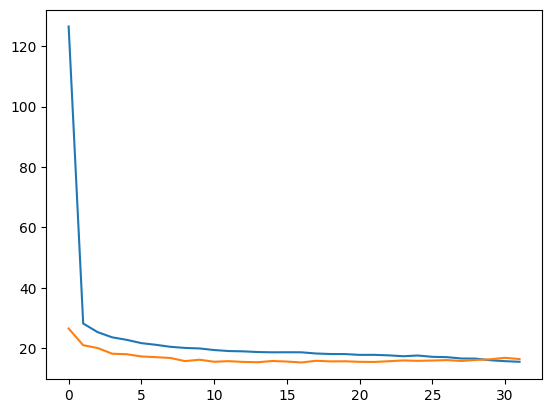

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

y_pred = model.predict(X_test_scaled)

# y_pred = np.round(y_pred).astype(int)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2_score: {r2_score(y_test , y_pred):.4f}")


253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Absolute Error (MAE): 3.20
Mean Squared Error (MSE): 15.32
Root Mean Squared Error (RMSE): 3.91
R2_score: 0.8258


In [ ]:
model.save("model_ann.keras")

In [ ]:
# from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor , AdaBoostRegressor, BaggingRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [ ]:
# models = {
#     'LinearRegression': LinearRegression(),
#     'Ridge': Ridge(),
#     'Lasso': Lasso(),
#     'ElasticNet': ElasticNet(),
#     'DecisionTreeRegressor': DecisionTreeRegressor(),
#     'RandomForestRegressor': RandomForestRegressor(),
#     'ExtraTreesRegressor': ExtraTreesRegressor(),
#     'AdaBoostRegressor': AdaBoostRegressor(),
#     'BaggingRegressor': BaggingRegressor(),
#     'SVR': SVR(),
#     'KNeighborsRegressor': KNeighborsRegressor(),
#     'XGBRegressor': XGBRegressor(),
#     'LGBMRegressor': LGBMRegressor()
# }
# scores = []
# for item in models.items():
#   model = item[1]
#   model.fit(X_train_scaled , y_train)
#   y_pred = model.predict(X_test_scaled)
#   r2 = r2_score(y_test , y_pred)
#   mae = mean_absolute_error(y_test , y_pred)
#   mse = mean_squared_error(y_test , y_pred)
#   scores.append([item[0] , r2 , mae , mse])
# result = pd.DataFrame(scores , columns = ["Model" , "R2" , "MAE" , "MSE"])

In [ ]:
# result.sort_values(by='R2', ascending=False)

In [ ]:
# model = XGBRegressor(n_estimators=800,learning_rate=0.05,max_depth=7,subsample=0.9,colsample_bytree=0.9,min_child_weight=3,reg_lambda=2,reg_alpha=1,gamma=0.3,objective='reg:squarederror',tree_method='hist',random_state=42)

In [ ]:
# model.fit(X_train_scaled , y_train)

In [ ]:
# y_pred = model.predict(X_test_scaled)

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R2_score: {r2_score(y_test , y_pred):.4f}")

In [ ]:
# model.save_model("Model.json")

In [ ]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
import pickle

with open("columns.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)

In [ ]:
# importfeature = pd.DataFrame(model.feature_importances_ , index=X.columns)

In [ ]:
# importfeature[0].sort_values(ascending = False)